# Fitting the data

In [16]:
import ProjectPackage.FitSB as FitSB
import ProjectPackage.fit as fit
import ProjectPackage.DataExtraction as de
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Fitting on MC data

> * A first fit on Monte Carlo (mc) data for each pT range, to give entry parameters for the double sided crystal ball (2CB) when fitting the experimental (xp) data. The 2CB is fitted on the reconstructed invariant mass spectrum for dimuons with $J/\Psi$ GenmotherPDGcode.
> * All the fitted data remains accessible in the dictCBmc dictionnary if needed

In [61]:
def plot_save_fitmc(dict_histmc,dict2CBmc):
    for idx in range(7):
        fig, axs = plt.subplots(figsize=(8, 5)) 
        plt.semilogy()
        miny=0.01
        idxstep=1
        if idx == 6: idxstep=2
        if idx > 3: miny=0.
        maxy = 20000
        plt.xlim(2.,4)
        plt.ylim(miny,maxy)
        xdata = dict_histmc[(idx,idx+idxstep)][1][0:-1]
        plt.errorbar(dict2CBmc['xfmc'][idx],dict2CBmc['yfmc'][idx],dict2CBmc['sigmafmc'][idx],drawstyle='steps',ls=":",label="Fitted data",color='#006699')
        plt.plot(xdata,dict2CBmc['yfCBmc'][idx], label="2CB fit",color='#FF1919')       
        axs.set_ylabel("$dN/dM_{\mu\mu}/10MeV$")
        plt.title("Invariant dimuon mass for $p_T\in["+str(idx)+","+str(idx+idxstep)+"]GeV$ with $J/\Psi$ GenMotherPDGCode")
        axs.set_xlabel("$M_{\mu\mu}$ [GeV]")
        plt.legend(loc='best')
        fig.savefig("./Saved/All/Plotsfit2CBmc/pTin"+str(idx)+str(idx+idxstep)+"GeVfit2CBAllrunsmc.png", dpi=300, transparent=False, bbox_inches='tight')
        plt.show()

def plot_save_fit(dict_hist,dict2CB):
    for idx in range(7):
        fig, axs = plt.subplots(figsize=(8, 5)) 
        plt.semilogy()
        miny=1
        idxstep=1
        if idx == 6: idxstep=2
        if idx > 3: miny=0.
        maxy = 20000
        plt.xlim(2.,4)
        plt.ylim(miny,maxy)
        xdata = dict_hist[(idx,idx+idxstep)][1][0:-1]
        bg = fit.expo(dict2CB['paramsf'][idx][7:9],xdata)+fit.expo(dict2CB['paramsf'][idx][9:11],xdata)
        plt.errorbar(dict2CB['xf'][idx],dict2CB['yf'][idx],dict2CB['sigmaf'][idx],drawstyle='steps',ls=":",label="Fitted data",color='#006699')
        plt.plot(dict2CB['xf'][idx],dict2CB['yfGlob'][idx], label="Global 2CB fit",color='#e65c00',linewidth=1)
        plt.plot(xdata,dict2CB['yfCB'][idx], label="2CB fit",color='#FF1919')       
        plt.plot(xdata,bg, label="Background fit",ls=":",color='#e65c00')  
        axs.set_ylabel("$dN/dM_{\mu\mu}/10MeV$")
        plt.title("Invariant dimuon mass for $p_T\in["+str(idx)+","+str(idx+idxstep)+"]GeV$ : all runs")
        axs.set_xlabel("$M_{\mu\mu}$ [GeV]")
        plt.legend(loc='best')
        fig.savefig("./Saved/All/Plotsfit2CB/pTin"+str(idx)+str(idx+idxstep)+"GeVfit2CBAllruns.png", dpi=300, transparent=False, bbox_inches='tight')
        plt.show() 

In [62]:
runmc = 'All'
rangefmc = [[1.6,3.5],[1.6,3.6],[1.6,3.6],[1.5,3.8],[1.5,3.6],[1.6,3.6],[1.6,3.6]]

dict_histmc = de.read_dict_hist(runmc,mc=1)
dictCBmc = FitSB.fitmcCB2dict(dict_histmc,rangefmc)
dfdictmc = {'MJpsimc': dictCBmc['MJPsimc'],'errMJpsimc': dictCBmc['errMJPsimc'], 'Nrawmc': dictCBmc['Nrawmc'], 'errNrawmc': dictCBmc['errNrawmc']}
dfFitmc= pd.DataFrame.from_dict(dfdictmc)
dfFitmc.to_csv (r'./Saved/All/dfNrawmc'+runmc+'.csv')

  0%|          | 0/7 [00:00<?, ?it/s]/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:45: RuntimeWarning: overflow encountered in double_scalars
  A2 = (n2/aa2)**n2 * fit.exp(- aa2**2 / 2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:45: RuntimeWarning: invalid value encountered in double_scalars
  A2 = (n2/aa2)**n2 * fit.exp(- aa2**2 / 2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:43: RuntimeWarning: overflow encountered in double_scalars
  A1 = (n1/aa1)**n1 * fit.exp(- aa1**2 / 2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:49: RuntimeWarning: invalid value encountered in multiply
  total += ((x-xb)/sig <= -a1) * N * A1 * (B1 - (x-xb)/sig)**(-n1)
/Applications/Miniforge3/envs/qqbar2mumu/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the paramete

0
1
2


 71%|███████▏  | 5/7 [00:00<00:00, 12.29it/s]

3
4
5
6


100%|██████████| 7/7 [00:00<00:00, 13.72it/s]


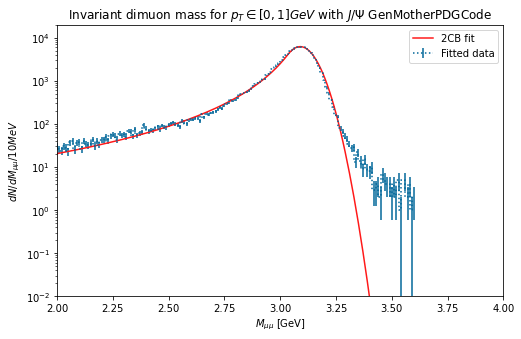

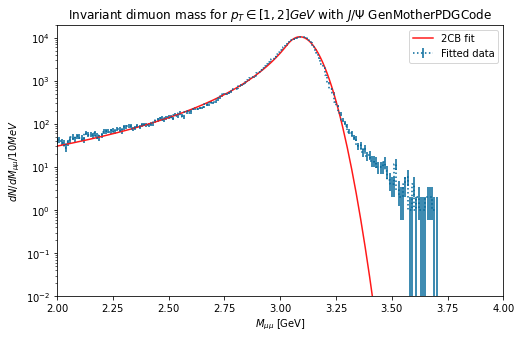

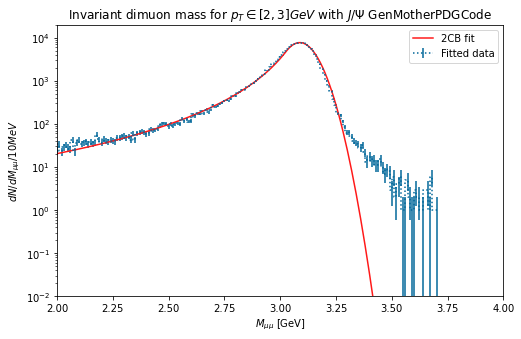

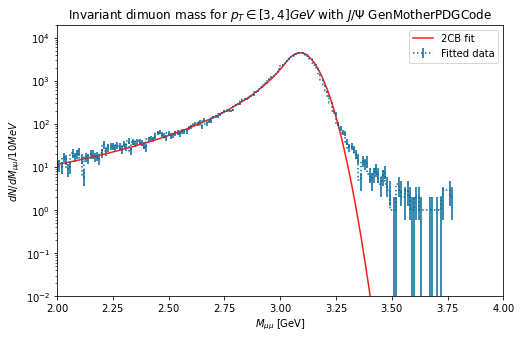

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_14864/1607620066.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


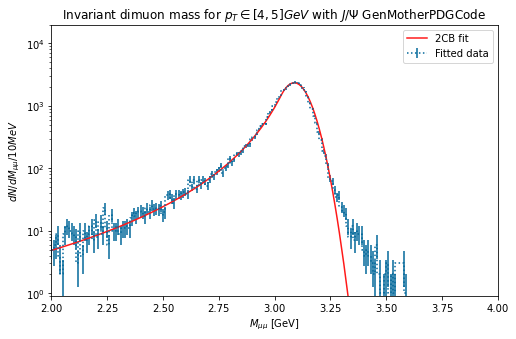

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_14864/1607620066.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


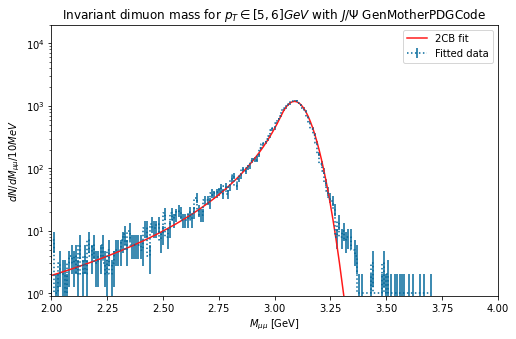

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_14864/1607620066.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


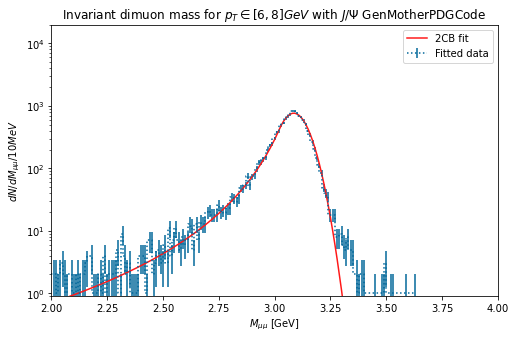

In [63]:
plot_save_fitmc(dict_histmc,dictCBmc)

In [64]:
dfFitmc

,MJpsimc,errMJpsimc,Nrawmc,errNrawmc
0,3.089192,inf,1164.488684,None
1,3.087909,inf,1991.433590,None
2,3.087296,inf,1470.470607,None
3,3.088166,inf,836.981380,None
4,3.087672,inf,430.276433,None
5,3.088775,inf,205.122262,None
6,3.085676,inf,129.713267,None


> * Most of the covariance matrices could not be computed, but it doesn't prevent us to work with the parameters. The fit range was tweaked for each dataset.
> * I tried to fit with two 2CB to take the resonance into account but it was less efficient with the code as it is designed for now

## Fitting on xp data

> * The data is stored in a dictionnary containing the data for all the $p_T$ ranges. The code computes for each entry a fitting with a global function written as a combination of a 2CB with a double exponential. 
> * The 2CB modelizes the invariant mass excess due to the $J/\Psi$, with the left tail due to the absorber impact and the right tail to (?? need to check !!)
> * I think there might be a problem in the way I modelized the 2CB from the one sided function found in the fit library. The corresponding parameters put the right inflexion point out of range, with more time it would be worth investigating furthermore
> * The double exponential modelizes the background on each side of the 2CB. The second one is needed to take into account the apparition of other resonances

In [65]:
run = 'All'
dict_hist = de.read_dict_hist(run,mc=0)

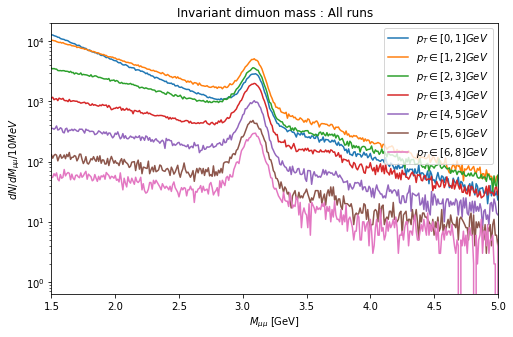

In [66]:
fig, axs = plt.subplots(figsize=(8, 5)) 
plt.semilogy()
plt.plot(dict_hist[(0,1)][1][0:-1],dict_hist[(0,1)][0])
plt.plot(dict_hist[(1,2)][1][0:-1],dict_hist[(1,2)][0])
plt.plot(dict_hist[(2,3)][1][0:-1],dict_hist[(2,3)][0])
plt.plot(dict_hist[(3,4)][1][0:-1],dict_hist[(3,4)][0])
plt.plot(dict_hist[(4,5)][1][0:-1],dict_hist[(4,5)][0])
plt.plot(dict_hist[(5,6)][1][0:-1],dict_hist[(5,6)][0])
plt.plot(dict_hist[(6,8)][1][0:-1],dict_hist[(6,8)][0])
plt.xlim(1.5,5.)
axs.set_ylabel("$dN/dM_{\mu\mu}/10MeV$")
plt.title("Invariant dimuon mass : All runs")
axs.legend(["$p_T\in[0,1]GeV$","$p_T\in[1,2]GeV$","$p_T\in[2,3]GeV$","$p_T\in[3,4]GeV$","$p_T\in[4,5]GeV$","$p_T\in[5,6]GeV$","$p_T\in[6,8]GeV$"])
axs.set_xlabel("$M_{\mu\mu}$ [GeV]")
plt.show()
fig.savefig("./Saved/All/AllpTAllruns.png",dpi=300, transparent=False, bbox_inches='tight')

> * Once again the fit is performed on xp data for each pT range, this time with the corresponding entry parameters found with MC data for the 2CB. All the fitting data is returned as a dictionary for the notebook purpose, and saved as a dataframe.
> * Each ydata and error entry with a 0 value and the corresponding xdata entry is removed from the data set before being fitted
> * The 2CB normalisation entry parameter N is readjusted with the maximum ydata value since it is not correlated with the MC value
> * The exponential entry parameters are computed by calculated the slope on each side of the 2CB, then the constant thanks to the slope (log(y)=a+xb). 
> * By doing so each data set could be fitted, and the fit was able to return the covariance matrices
> * The fitting ranges need to be tweaked for each $p_T$ range data set, since the behaviour of the $J/\Psi$ production differs. 
> * The last two sets could not be fitted because of the lack of statistics

In [67]:
rangef = [[1.8,4.2],[1.6,4.2],[1.6,4.2],[1.5,4.],[1.5,4.],[1.5,4.],[1.5,4.]]
dict2CB = FitSB.fitCB2dict(dict_hist,dictCBmc['paramsfmc'],rangef)
dfdict = {'MJpsi': dict2CB['MJPsi'],'errMJpsi': dict2CB['errMJPsi'], 'Nraw': dict2CB['Nraw'], 'errNraw': dict2CB['errNraw']}
dfFit= pd.DataFrame.from_dict(dfdict)
dfFit.to_csv (r'./Saved/All/dfNrawAllruns.csv')

  0%|          | 0/7 [00:00<?, ?it/s]

0


 29%|██▊       | 2/7 [00:00<00:01,  4.80it/s]

1
2


 43%|████▎     | 3/7 [00:00<00:00,  5.81it/s]/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:43: RuntimeWarning: overflow encountered in double_scalars
  A1 = (n1/aa1)**n1 * fit.exp(- aa1**2 / 2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:49: RuntimeWarning: invalid value encountered in multiply
  total += ((x-xb)/sig <= -a1) * N * A1 * (B1 - (x-xb)/sig)**(-n1)


3


 57%|█████▋    | 4/7 [00:00<00:00,  5.09it/s]

4


 86%|████████▌ | 6/7 [00:01<00:00,  4.31it/s]

5
6


100%|██████████| 7/7 [00:01<00:00,  4.74it/s]


In [68]:
dfFit

,MJpsi,errMJpsi,Nraw,errNraw
0,3.086179,0.000868,448.408510,NaN
1,3.085086,0.000765,803.561209,NaN
2,3.080315,0.000889,702.673560,NaN
3,3.080467,0.000944,398.260312,NaN
4,3.080375,0.001069,213.523081,NaN
5,3.079069,0.001440,90.778166,NaN
6,3.079316,0.001684,52.158023,NaN


> * The MJpsi value is not really the mass but the $J/\Psi$ peak position

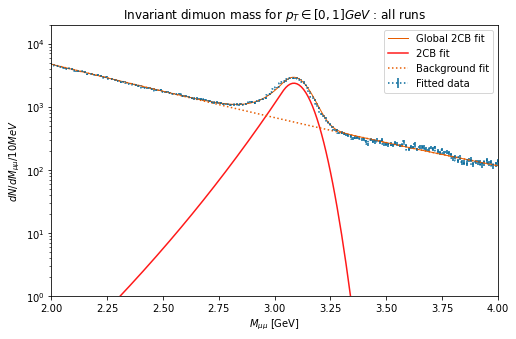

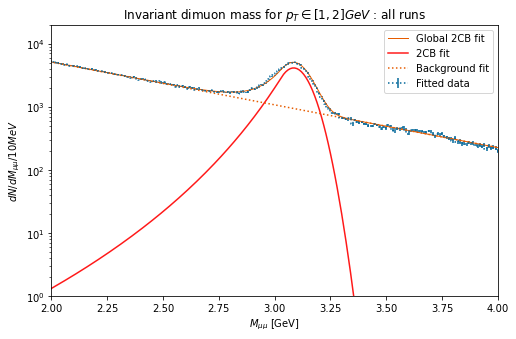

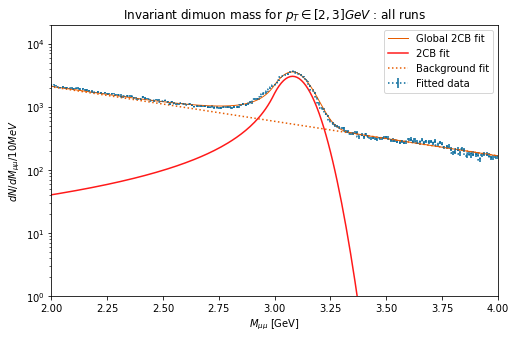

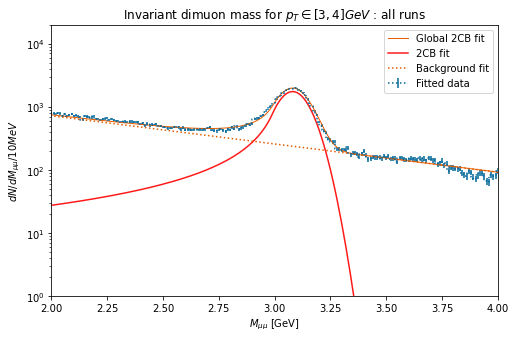

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_14864/1607620066.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


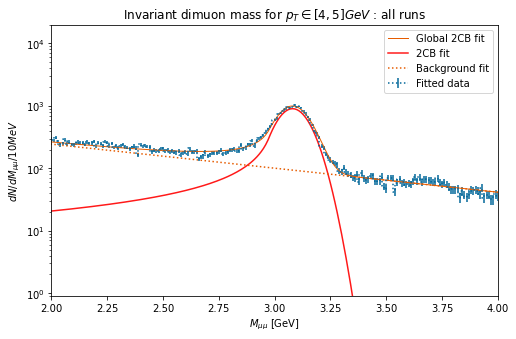

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_14864/1607620066.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


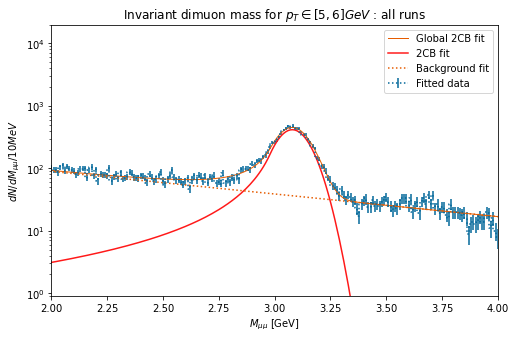

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_14864/1607620066.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


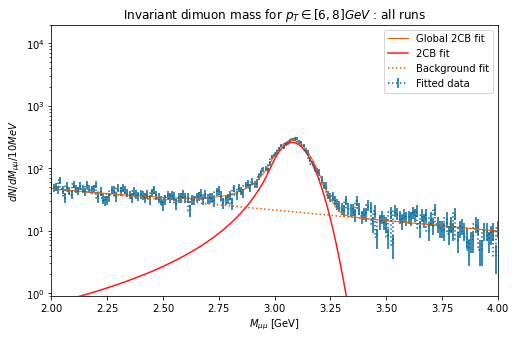

In [69]:
plot_save_fit(dict_hist,dict2CB)